In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from nn_modules import Linear,LogSoftMax,Tanh,CrossEntropyLog
from network import *
from transforms import one_hot
np.random.seed(0)

In [2]:
#data courtesy- Vision group RWTH
data_dir="data/MNIST_vision_RWTH/"
#X data needs to be normalized
#Y data needs to be converted to one-hot representation
X_train = np.loadtxt(data_dir+"mnist-train-data.csv")/255
T_train = one_hot(np.loadtxt(data_dir+"mnist-train-labels.csv",dtype=int))

X_valid = np.loadtxt(data_dir+"mnist-valid-data.csv")/255
T_valid = one_hot(np.loadtxt(data_dir+"mnist-valid-labels.csv",dtype=int))

X_test = np.loadtxt(data_dir+"mnist-test-data.csv")/255
T_test = one_hot(np.loadtxt(data_dir+"mnist-test-labels.csv",dtype=int))

<IPython.core.display.Javascript object>


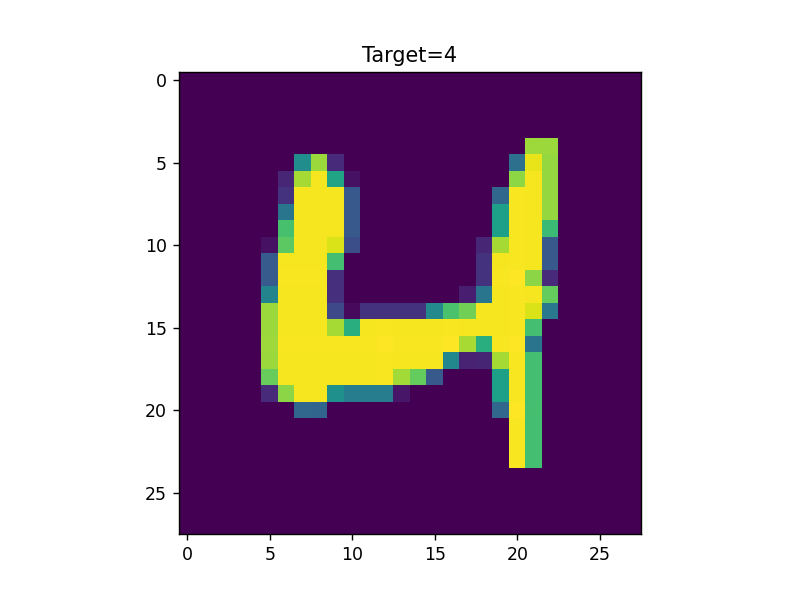

In [3]:
def data_viz(X,T,idx=None):
    """
    Function to visualize the provided dataset.

    Parameters
    ----------
    X : numpy.ndarray
        X Data.
    T : numpy.ndarray
        Targets in one-hot form.
    idx : int, optional
        Index of the data to be visualized. The default is None. In this case a random index is chosen

    Returns
    -------
    None.

    """
    N,N_in=X.shape
    h=w=int(np.sqrt(N_in))
    if idx==None:
        idx=np.random.randint(low=0,high=N)
    else:
        assert idx<N, "Index provided is greater than largest possible index ({i})".format(i=N-1)
    img=X[idx,:].reshape(h,w)
    t=np.argmax(T[idx,:])
    plt.imshow(img)
    plt.title("Target={t}".format(t=t))

data_viz(X_train,T_train)

In [4]:
#defining training parameters
N_train,N_in=X_train.shape
N_class=T_train.shape[1]
batch_size=600
rate=0.1
n_epochs=100

In [5]:
#defining the neural network
net=Network(layers=[Linear(N_in,200),
                    Tanh(),
                    Linear(200,10),
                    LogSoftMax()],
            loss=CrossEntropyLog())

<IPython.core.display.Javascript object>


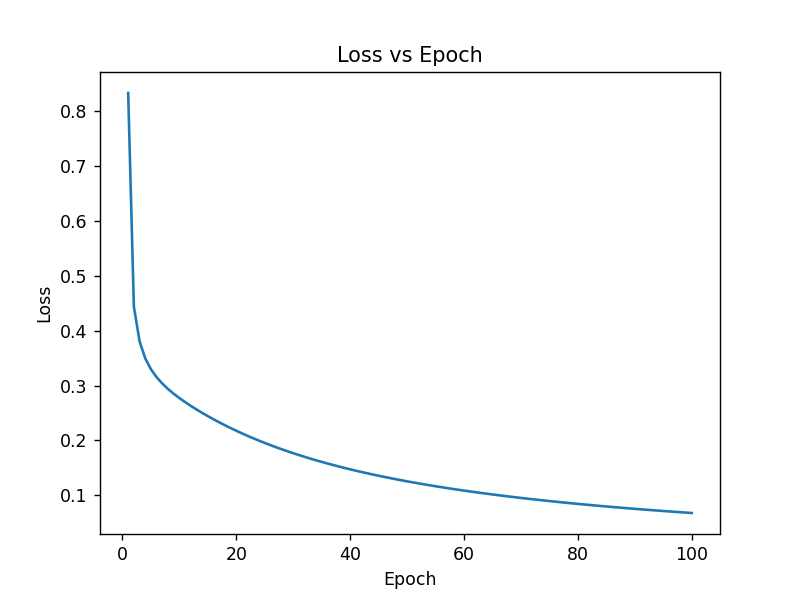

In [6]:
#training the network
losses=net.train(X_train,T_train,
               n_epochs=n_epochs,
               batch_size=batch_size,
               rate=rate)

In [7]:
Y_valid_test=net.predict(X_test)
acc=(Y_valid_test==np.argmax(T_test,axis=1)).sum()/Y_valid_test.size
print("Accuracy on Test Data=",acc)

Accuracy on Test Data= 0.9726
